In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
def generate_percentages(N):
    """Generate data from log-normal distributions and normalize to sum to 100"""
    random_N = np.random.lognormal(mean=0, sigma=3, size=N)
    return (random_N / sum(random_N)) * 100

In [ ]:
# Generate the data
data = [generate_percentages(8) for _ in range(100)]

In [6]:
len(data), data[0].shape

(100, (8,))

In [7]:
# Create a DataFrame
df = pd.DataFrame(data)

In [9]:
df.shape

(100, 8)

In [18]:
df = df.rename(columns={ii: letter for ii, letter in enumerate(["a", "b", "c", "d", "e", "f", "g", "h"])})

In [29]:
df.sum(axis=1)

0     100.0
1     100.0
2     100.0
3     100.0
4     100.0
      ...  
95    100.0
96    100.0
97    100.0
98    100.0
99    100.0
Length: 100, dtype: float64

In [55]:
# Create pastel colormap
from matplotlib.colors import ListedColormap
pastel_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#99FFFF', '#FFD700', '#FF99FF', '#B3B3CC']
pastel_cmap = ListedColormap(pastel_colors)

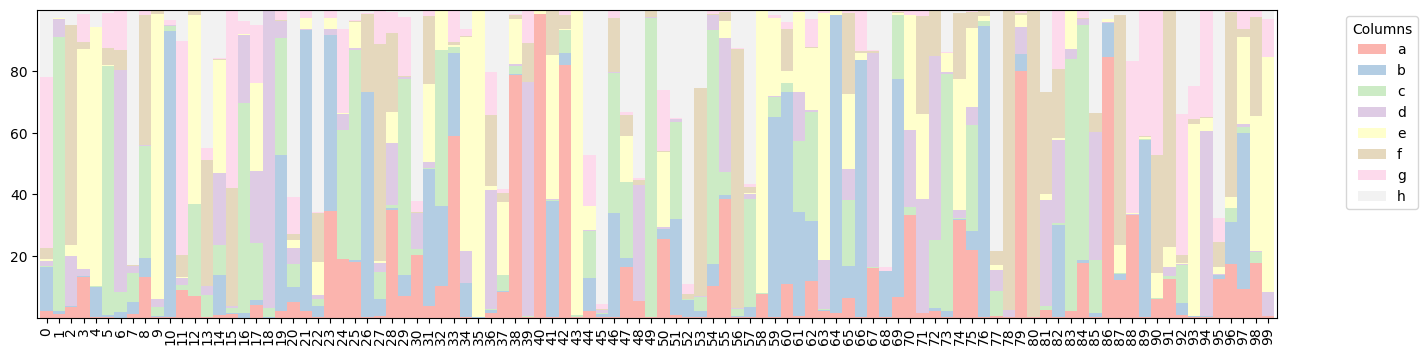

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
#df.plot(kind='bar', stacked=True, width=1, colormap=pastel_cmap, ax=ax)
df.plot(kind='bar', stacked=True, width=1, colormap='Pastel1', ax=ax)
ax.legend(title='Columns', bbox_to_anchor=(1.05, 1), loc='upper left')

TODO: ask chatgpt to re-arrange the order of the rows so that the bars are grouped together. This is done in that example https://github.com/cxli233/FriendsDontLetFriends/blob/main/Scripts/stacked_bars_optimization.Rmd